In [43]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.metrics import accuracy_score, precision_score, f1_score,confusion_matrix, ConfusionMatrixDisplay

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import neattext.functions as nfx
import matplotlib.pyplot as plt

In [2]:
#ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Raw_Text_Data.csv')

In [6]:
df.head()

,Unnamed: 0,Text,Emotion
0,0,Dorian Gray with Rainbow Scarf #LoveWins (from...,joy
1,1,@SelectShowcase @Tate_StIves ... Replace with ...,joy
2,2,@Sofabsports thank you for following me back. ...,joy
3,3,@britishmuseum @TudorHistory What a beautiful ...,joy
4,4,@NationalGallery @ThePoldarkian I have always ...,joy


In [7]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df

,Text,Emotion
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,joy
1,@SelectShowcase @Tate_StIves ... Replace with ...,joy
2,@Sofabsports thank you for following me back. ...,joy
3,@britishmuseum @TudorHistory What a beautiful ...,joy
4,@NationalGallery @ThePoldarkian I have always ...,joy
...,...,...
37657,@MichelGW have you gift! Hope you like it! It'...,surprise
37658,The world didnt give it to me..so the world MO...,joy
37659,A man robbed me today .,anger
37660,"Youu call it JEALOUSY, I call it of #Losing YO...",fear


In [9]:
df.Emotion.value_counts()

joy         12191
sadness      6754
fear         5410
anger        4357
surprise     4108
neutral      3825
disgust       871
shame         146
Name: Emotion, dtype: int64

In [10]:
df.isna().sum()

Text       0
Emotion    0
dtype: int64

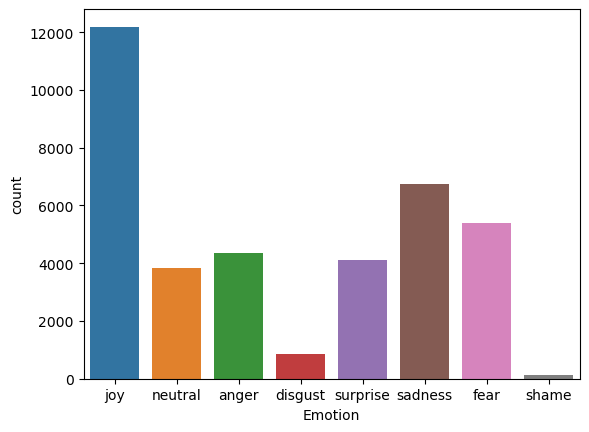

In [11]:
sns.countplot(x = 'Emotion', data = df)
plt.show()

# Data Preperation

 Data Cleaning

In [12]:
df['Cleaned_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [13]:
df.head()

,Text,Emotion,Cleaned_Text
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,joy,Dorian Gray with Rainbow Scarf #LoveWins (from...
1,@SelectShowcase @Tate_StIves ... Replace with ...,joy,... Replace with your wish which the artis...
2,@Sofabsports thank you for following me back. ...,joy,thank you for following me back. Great to he...
3,@britishmuseum @TudorHistory What a beautiful ...,joy,What a beautiful jewel / portrait. Is the ...
4,@NationalGallery @ThePoldarkian I have always ...,joy,I have always loved this painting.


In [14]:
df['Cleaned_Text'] = df['Cleaned_Text'].apply(nfx.remove_stopwords)
df.head()

,Text,Emotion,Cleaned_Text
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,joy,Dorian Gray Rainbow Scarf #LoveWins (from http...
1,@SelectShowcase @Tate_StIves ... Replace with ...,joy,... Replace wish artist uses installation! ent...
2,@Sofabsports thank you for following me back. ...,joy,thank following back. Great hear diverse &amp;...
3,@britishmuseum @TudorHistory What a beautiful ...,joy,beautiful jewel / portrait. 'R' Rex ?
4,@NationalGallery @ThePoldarkian I have always ...,joy,loved painting.


In [15]:
df['Cleaned_Text'] = df['Cleaned_Text'].apply(nfx.remove_special_characters)
df.head()

,Text,Emotion,Cleaned_Text
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,joy,Dorian Gray Rainbow Scarf LoveWins from httptc...
1,@SelectShowcase @Tate_StIves ... Replace with ...,joy,Replace wish artist uses installation entralling
2,@Sofabsports thank you for following me back. ...,joy,thank following back Great hear diverse amp in...
3,@britishmuseum @TudorHistory What a beautiful ...,joy,beautiful jewel portrait R Rex
4,@NationalGallery @ThePoldarkian I have always ...,joy,loved painting


In [16]:
#Features nd labels
X_features = df['Cleaned_Text'] 
y_labels = df['Emotion']

In [17]:
X_train, X_text,Y_train, Y_test = train_test_split(X_features,y_labels,test_size=0.3, random_state=42)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
Pipeline_logreg = Pipeline(steps = [('cv',CountVectorizer()),('logistic', LogisticRegression(solver='lbfgs', max_iter=3000))])

In [20]:
Pipeline_logreg.fit(X_train,Y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('logistic', LogisticRegression(max_iter=3000))])

In [21]:
Pipeline_logreg.score(X_text, Y_test)

0.6334188866271352

In [22]:
Pipeline_logreg.predict(['Im so happy today'])

array(['joy'], dtype=object)

In [23]:
Pipeline_logreg.predict_proba(['Im so happy today'])

array([[4.18506863e-03, 2.58751882e-03, 3.60749331e-03, 8.64968370e-01,
        2.23188798e-03, 4.65395091e-02, 9.18919013e-05, 7.57882601e-02]])

In [24]:
Pipeline_logreg.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [25]:
Y_pred = Pipeline_logreg.predict(X_text)

In [26]:
accuracy_score(Y_test, Y_pred)

0.6334188866271352

In [29]:
f1_score(Y_test, Y_pred,average='micro')

0.6334188866271352

In [30]:
precision_score(Y_test, Y_pred,average='micro')


0.6334188866271352

In [31]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 720,   16,   67,  201,   93,  171,    1,   34],
       [  31,   52,   25,   67,   14,   58,    0,   22],
       [  72,    7, 1059,  243,   61,  133,    0,   49],
       [ 102,   14,  107, 2824,  223,  279,    1,  185],
       [  24,    0,   22,  202,  819,   47,    0,   15],
       [ 117,    9,  101,  444,  105, 1120,    0,   95],
       [   1,    0,    1,    3,    2,    2,   30,    1],
       [  58,    3,   52,  403,   43,  116,    0,  533]], dtype=int64)

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (2).

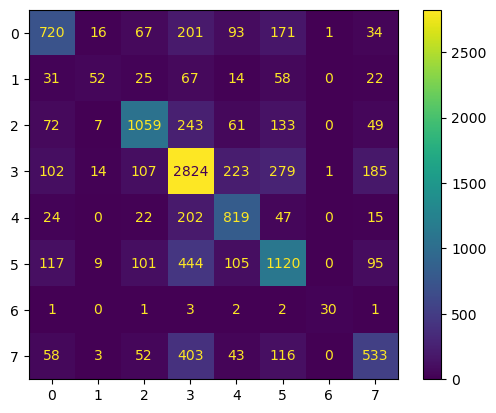

In [32]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
# plt.show()

In [33]:
import joblib
pipeline_file = open('emotion_det_lr_pipe.pkl','wb') 
joblib.dump(Pipeline_logreg,pipeline_file)
pipeline_file.close()

In [34]:
X_text.to_csv('emotion_det_X_test.csv')
Y_test.to_csv('emotion_det_Y_test.csv')

In [65]:
#rough
# /dic={1:["dav","raj","ram"], 2:["hav","gggg","fff"]}
# df = pd.DataFrame(dic)
# df

In [66]:
# df1 = df.T.reset_index()

In [67]:
# df1

In [68]:
# df1.columns = ["no","sci","mat","eng"]

In [69]:
# df1

In [35]:
df1 = df
df1

,Text,Emotion,Cleaned_Text
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,joy,Dorian Gray Rainbow Scarf LoveWins from httptc...
1,@SelectShowcase @Tate_StIves ... Replace with ...,joy,Replace wish artist uses installation entralling
2,@Sofabsports thank you for following me back. ...,joy,thank following back Great hear diverse amp in...
3,@britishmuseum @TudorHistory What a beautiful ...,joy,beautiful jewel portrait R Rex
4,@NationalGallery @ThePoldarkian I have always ...,joy,loved painting
...,...,...,...
37657,@MichelGW have you gift! Hope you like it! It'...,surprise,gift Hope like it hand wear Itll warm Lol
37658,The world didnt give it to me..so the world MO...,joy,world didnt meso world DEFINITELY cnt away
37659,A man robbed me today .,anger,man robbed today
37660,"Youu call it JEALOUSY, I call it of #Losing YO...",fear,Youu JEALOUSY Losing YOU


In [36]:
df1['Emotion'] = '__label__' + df1['Emotion'].astype(str)
df.head(5)

,Text,Emotion,Cleaned_Text
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,__label__joy,Dorian Gray Rainbow Scarf LoveWins from httptc...
1,@SelectShowcase @Tate_StIves ... Replace with ...,__label__joy,Replace wish artist uses installation entralling
2,@Sofabsports thank you for following me back. ...,__label__joy,thank following back Great hear diverse amp in...
3,@britishmuseum @TudorHistory What a beautiful ...,__label__joy,beautiful jewel portrait R Rex
4,@NationalGallery @ThePoldarkian I have always ...,__label__joy,loved painting


In [37]:
df1['category_description'] = df1['Emotion'] + ' ' + df1['Cleaned_Text']
df

,Text,Emotion,Cleaned_Text,category_description
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,__label__joy,Dorian Gray Rainbow Scarf LoveWins from httptc...,__label__joy Dorian Gray Rainbow Scarf LoveWin...
1,@SelectShowcase @Tate_StIves ... Replace with ...,__label__joy,Replace wish artist uses installation entralling,__label__joy Replace wish artist uses install...
2,@Sofabsports thank you for following me back. ...,__label__joy,thank following back Great hear diverse amp in...,__label__joy thank following back Great hear d...
3,@britishmuseum @TudorHistory What a beautiful ...,__label__joy,beautiful jewel portrait R Rex,__label__joy beautiful jewel portrait R Rex
4,@NationalGallery @ThePoldarkian I have always ...,__label__joy,loved painting,__label__joy loved painting
...,...,...,...,...
37657,@MichelGW have you gift! Hope you like it! It'...,__label__surprise,gift Hope like it hand wear Itll warm Lol,__label__surprise gift Hope like it hand wear ...
37658,The world didnt give it to me..so the world MO...,__label__joy,world didnt meso world DEFINITELY cnt away,__label__joy world didnt meso world DEFINITELY...
37659,A man robbed me today .,__label__anger,man robbed today,__label__anger man robbed today
37660,"Youu call it JEALOUSY, I call it of #Losing YO...",__label__fear,Youu JEALOUSY Losing YOU,__label__fear Youu JEALOUSY Losing YOU


In [38]:
import re
def preprocess(text):
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub("[ \n]+", " ", text)
    return text.strip().lower() 

In [39]:
df1['Cleaned_Text'] = df1['Cleaned_Text'].map(preprocess)
df1

,Text,Emotion,Cleaned_Text,category_description
0,Dorian Gray with Rainbow Scarf #LoveWins (from...,__label__joy,dorian gray rainbow scarf lovewins from httptc...,__label__joy Dorian Gray Rainbow Scarf LoveWin...
1,@SelectShowcase @Tate_StIves ... Replace with ...,__label__joy,replace wish artist uses installation entralling,__label__joy Replace wish artist uses install...
2,@Sofabsports thank you for following me back. ...,__label__joy,thank following back great hear diverse amp in...,__label__joy thank following back Great hear d...
3,@britishmuseum @TudorHistory What a beautiful ...,__label__joy,beautiful jewel portrait r rex,__label__joy beautiful jewel portrait R Rex
4,@NationalGallery @ThePoldarkian I have always ...,__label__joy,loved painting,__label__joy loved painting
...,...,...,...,...
37657,@MichelGW have you gift! Hope you like it! It'...,__label__surprise,gift hope like it hand wear itll warm lol,__label__surprise gift Hope like it hand wear ...
37658,The world didnt give it to me..so the world MO...,__label__joy,world didnt meso world definitely cnt away,__label__joy world didnt meso world DEFINITELY...
37659,A man robbed me today .,__label__anger,man robbed today,__label__anger man robbed today
37660,"Youu call it JEALOUSY, I call it of #Losing YO...",__label__fear,youu jealousy losing you,__label__fear Youu JEALOUSY Losing YOU


In [40]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.2)

In [41]:
train.to_csv("emotion.train", columns=["category_description"], index=False, header=False)
test.to_csv("emotion.test", columns=["category_description"], index=False, header=False)

In [42]:
import fasttext
model = fasttext.train_supervised(input="emotion.train")
model.test("emotion.test")

(7533, 0.6338776052037701, 0.6338776052037701)

In [43]:
model.predict('i am very happy')

(('__label__joy',), array([0.96721369]))